Agent is standing on a frozen lake. The lake is not all frozen, there are some parts where the ice is very thin. The goal is to go from place S to G without falling into the holes.


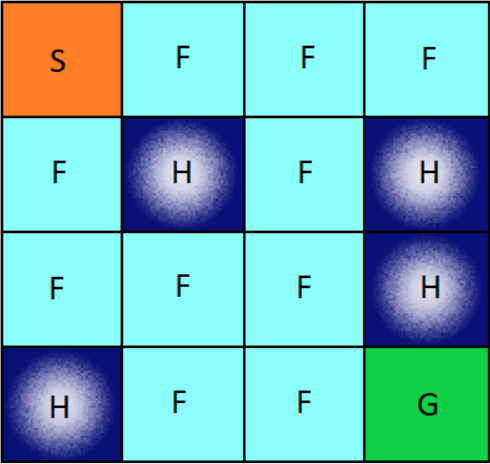

S -> starting point, safe                      
G -> goal, where is the frisbee located                    
F -> solid ice, safe                             
H  -> hole, wher agent can fall down                        







---





The agent has 4 possible moves;                    
0 -> left          
1 -> right                   
2 -> down                           
3 -> up                                





---







state F -> the agent gets 0 reward                                                                         



state H -> the agent gets -1 reward as in state H the agent will die






reaching the goal -> the agent gets +1 reward.




In [1]:
import numpy as np
import gym # reinforcement learning library
import random
from IPython.display import clear_output # to display
from time import sleep # for freezing the time

In [2]:
# it generates an environment called FrozenLake
env = gym.make("FrozenLake-v0")

In [3]:
# Q table for q learning
Q = {}

# s -> state
for s in range(env.observation_space.n):
  #a -> action
  for a in range(env.action_space.n):
    # initialing the states and actions of table with 0
    Q[(s,a)] = 0.0

In [4]:
# setting the action
def epsilon_greedy(state,epsilon):
  if random.uniform(0,1) < epsilon:
    return env.action_space.sample()
  else:
    return max(list(range(env.action_space.n)), key= lambda x:Q[(state,x)])

In [5]:
# setting the parameters
alpha = 0.99
gamma = 0.9
epsilon = 0.99
num_episodes = 50000
num_timesteps = 1000

In [6]:
frames = []

#learning the environment and training
for i in range(num_episodes):
  s = env.reset()
  for j in range(num_timesteps):
    a = epsilon_greedy(s,epsilon)
    # s_ -> next state
    # r -> reward
    # done shows it is finished or not
    s_, r, done, _ = env.step(a)
    # gets the maximum of a with respect to Q table
    a_ = np.argmax(Q[(s_, a)] for a in range(env.action_space.n))
    # adding up to Q table 
    Q[(s, a)] += alpha + (r + gamma + Q[(s_, a_)] - Q[(s, a)])
    # updating old state with new state
    s = s_
    # appending to frames list for animation
    frames.append({
        'frame': env.render(mode = 'ansi'),
        'state': s_,
        'action': a,
        'reward': r
    })

    if done:
      break

In [ ]:
# for animation
def print_frames(frames):
  for i, frame in enumerate(frames):
    clear_output(wait = True)
    print(frame['frame'])
    print(f"Timesteps: {i+1}")
    print(f"State: {frame['state']}")
    print(f"Action: {frame['action']}")
    print(f"Reward: {frame['reward']}")
    sleep(.1)
  
print_frames(frames)

  (Right)
SFFF
FHFH
FFFH
HFFG

Timesteps: 26082
State: 8
Action: 2
Reward: 0.0
